In [1]:
from onset_detect import Onset_Detect
from offset_detect import Offset_Detect

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
SR = 18750
HOP_LEN = 64
N_FFT = 512

In [3]:
DATA_DIR = Path('data')
samples_directories = [ directory for directory in DATA_DIR.iterdir() if directory.is_dir() ]
filesname = [ directory / "Ch1Dat" for directory in samples_directories ]
signals = [ np.fromfile(str(filename), dtype='float32') for filename in filesname ]

--------------------------------------------------


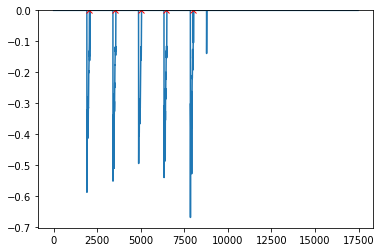

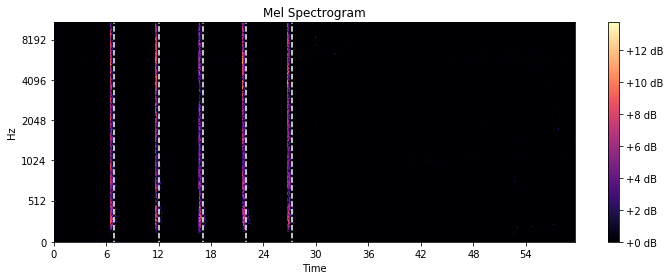

--------------------------------------------------


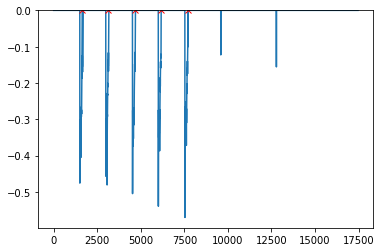

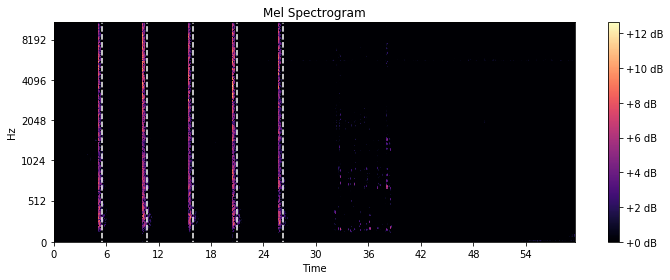

--------------------------------------------------


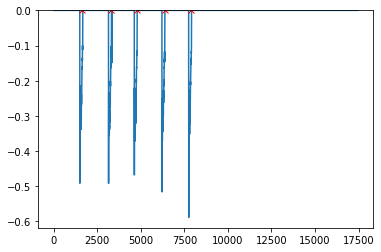

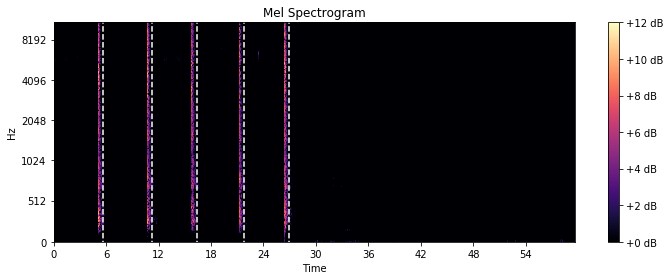

--------------------------------------------------


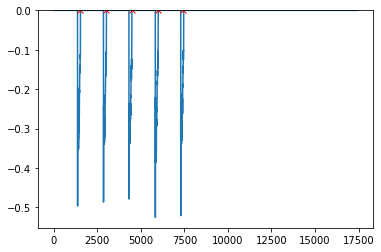

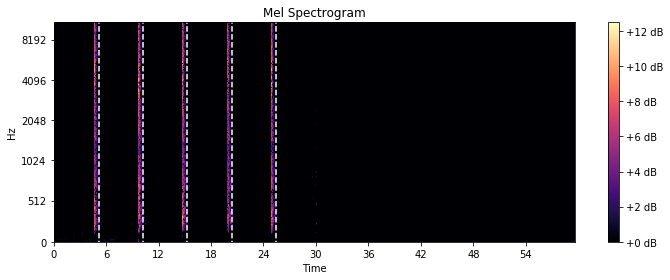

--------------------------------------------------


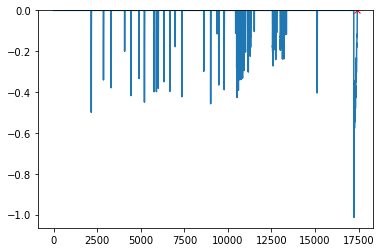

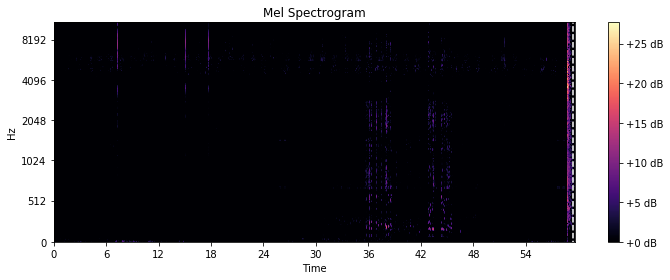

--------------------------------------------------


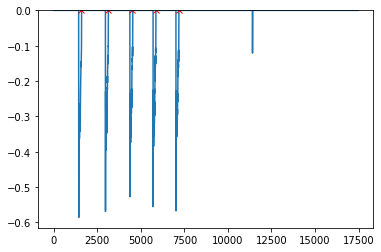

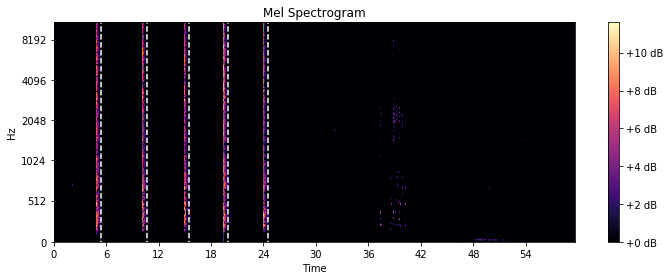

--------------------------------------------------


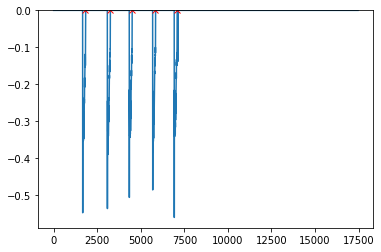

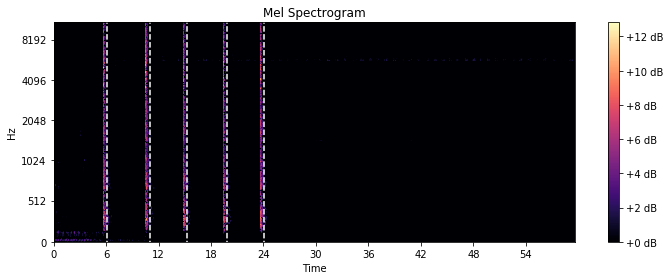

--------------------------------------------------


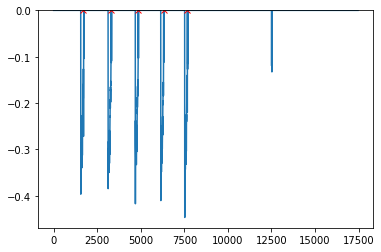

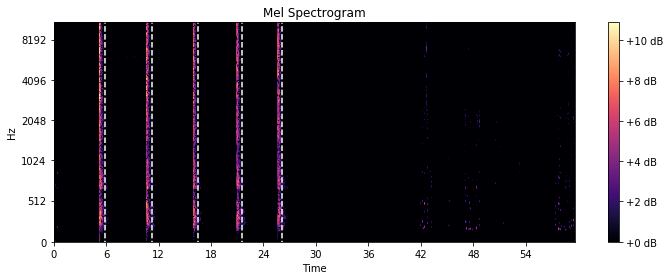

--------------------------------------------------


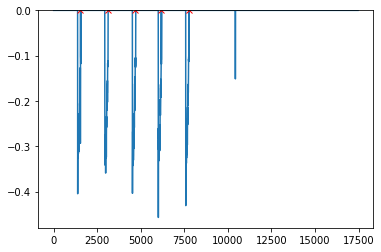

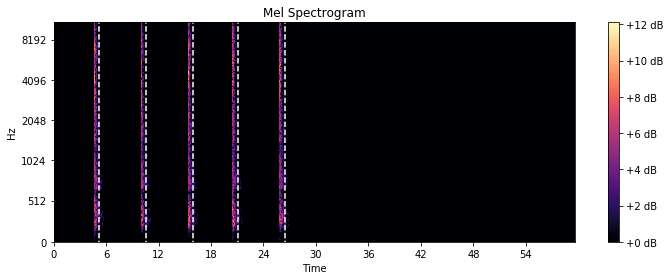

--------------------------------------------------


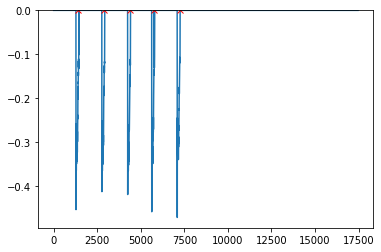

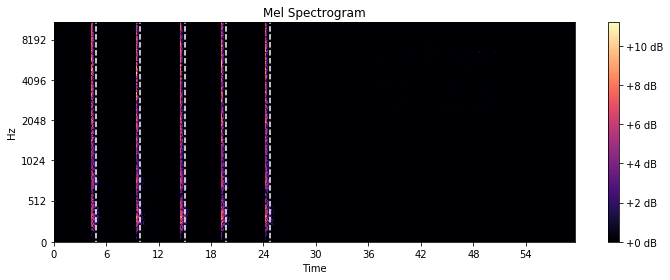

In [4]:
for signal in signals:
    audio = Onset_Detect(signal, SR, N_FFT, HOP_LEN)
    on_sets = audio.onset_detect(split_part=5)
    audio = Offset_Detect(signal, SR, N_FFT, HOP_LEN)
    off_sets = audio.offset_detect(on_sets, split_part=5)
    
    print('-' * 50)
    audio.draw_spectral_flux()
    plt.plot(off_sets, audio.n_spectral_flux(split_part=5)[on_sets], 'rx')
    audio.show()
    
    audio.spectrogram()
    audio.draw_vlines(off_sets)
    audio.show()